In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Скачайте набор данных с тремя переменными: sex, exang, num.


- Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). 


- Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

 
- Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

In [13]:
data = pd.read_csv("../data/train_data_tree.csv")
X_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]
X_train.head()

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [8]:
cls = DecisionTreeClassifier(criterion="entropy")
cls.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'sex <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'sex <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

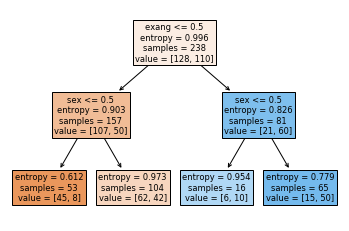

In [14]:
tree.plot_tree(cls, filled=True, feature_names=["sex", "exang"])

In [15]:
IG = 0.996 - (157 * 0.903 + 0.826 * 81)/238
round(IG, 3)

0.119

___
___



Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. 

- Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.


- Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, 


- а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.


In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predicted = dt.predict(X_test)

In [20]:
predicted

array([1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0])

___
___

Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:


- максимальная глубина - от 1 до 10 уровней


- минимальное число проб для разделения - от 2 до 10


- минимальное число проб в листе - от 1 до 10


и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

params = {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11)
    }

search = GridSearchCV(DecisionTreeClassifier(), params)

search.fit(X, y)

best_tree = search.best_estimator_

In [24]:
best_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

___
___


Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Здесь можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

- максимальная глубина - от 1 до 10 уровней


- минимальное число проб для разделения - от 2 до 10


- минимальное число проб в листе - от 1 до 10


Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

params = {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11)
    }

search = RandomizedSearchCV(DecisionTreeClassifier(), params)

search.fit(X, y)

best_tree = search.best_estimator_

F:\CodingForPython\Anaconda\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
